In [ ]:
# coding: utf-8

In [ ]:
#《学Python量量化，通往财务⾃自由》| 选股实战之CAPM模型

In [1]:
import pandas as pd
import tushare as ts
# 获取数据
pro = ts.pro_api()
wanke = pro.daily(ts_code='000002.SZ', start_date='20170101') 
pingan = pro.daily(ts_code='601318.SH', start_date='20170101') 
maotai = pro.daily(ts_code='600519.SH', start_date='20170101') 
wanhua = pro.daily(ts_code='002415.SZ', start_date='20170101')
keda = pro.daily(ts_code='002230.SZ', start_date='20170101')
hs300 = pro.index_daily(ts_code='000300.SH', start_date='20170101') 
# 仅保留留收益率数据，且⽤用⽇日期作为index
# 然后按照⽇日期排序(增序)
stock_list = [wanke, pingan, maotai, wanhua, keda, hs300] 
for stock in stock_list:
 stock.index = pd.to_datetime(stock.trade_date)
df = pd.concat([stock.pct_chg / 100 for stock in stock_list], axis=1)
df.columns = ['wanke', 'pingan', 'maotai', 'wanhua', 'keda', 'hs300']
df = df.sort_index(ascending=True)
df.describe()

,wanke,pingan,maotai,wanhua,keda,hs300
count,490.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,0.000889,0.001267,0.001556,0.001535,0.001415,-0.000080
std,0.025362,0.018419,0.019869,0.024539,0.030078,0.010593
min,-0.092593,-0.066100,-0.100000,-0.099861,-0.100177,-0.047990
25%,-0.012292,-0.008941,-0.009350,-0.011650,-0.013700,-0.005194
50%,-0.000900,0.000600,0.000300,0.000800,0.001000,0.000277
75%,0.010200,0.010803,0.012984,0.013743,0.015200,0.005183
max,0.100100,0.057200,0.082100,0.100157,0.100100,0.043167


In [2]:
df = df.fillna(0)
returns = (df + 1).product() - 1 
print('累计收益率:', returns)
print('标准差:', df.std())

累计收益率: wanke     0.322748
pingan    0.721867
maotai    0.958930
wanhua    0.842362
keda      0.611948
hs300    -0.065046
dtype: float64
标准差: wanke     0.025234
pingan    0.018419
maotai    0.019869
wanhua    0.024539
keda      0.030078
hs300     0.010593
dtype: float64


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'sans-serif'
#mpl.rcParams['font.sans-serif'] = 'SimHei'
#import matplotlib
a = sorted([f.name for f in mpl.font_manager.fontManager.ttflist])
for i in a:
        print (i)

Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Sans Mono
Bitstream Vera Serif
Bitstream Vera Serif
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif
DejaVu Serif Display
East Syriac Adiabene
East Syriac Ctesiphon
Estrangelo Antioch
Estrangelo Edessa
Estrangelo Midyat
Estrangelo Nisibin
Estrangelo Nisibin Outline
Estrangelo Quenneshrin
Estrangelo Talada
Estrangelo TurAbdin
Goha-Tibeb Zemen
Goha-Tibeb Zemen
Luxi Mono
Luxi Mono
Luxi Mono
Luxi Mono
Luxi Sans
Luxi Sans
Luxi Sans
Luxi Sans
Luxi Serif
Luxi Serif
Luxi Serif
Luxi Serif
STIXGeneral
STIXGeneral
STIXGeneral
STIXGeneral
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeOneSym
STIXSizeThreeSym
STI

In [ ]:
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='/Library/Fonts/Hanzipen.ttc',size=10)
ax1.set_xticklabels(ability_labels,fontproperties=font)



/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


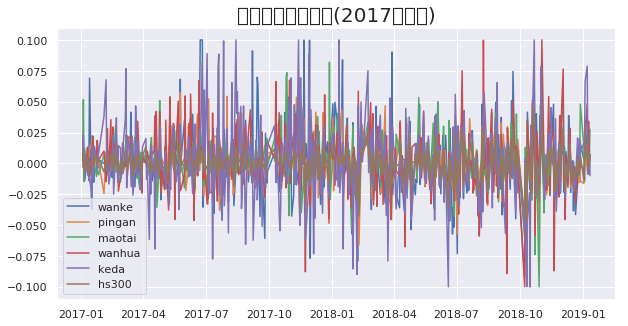

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set()
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(10, 5))
for col in df.columns:
 plt.plot(df[col], label=col) 
plt.title('⽇日收益率时序图(2017⾄至今)', fontsize=20) 
plt.legend();
plt.show()

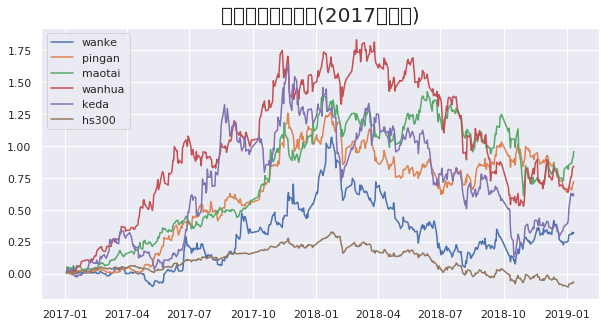

In [5]:
plt.figure(figsize=(10, 5))
for col in df.columns:
 plt.plot((df[col]+1).cumprod()-1, label=col) 
plt.title('累计收益率时序图(2017⾄至今)', fontsize=20) 
plt.legend();
plt.show()

In [6]:
rf = 1.032 ** (1/360) - 1
print(rf)

8.750012529978868e-05


In [7]:
df_rp = df - rf
df_rp.head()

,wanke,pingan,maotai,wanhua,keda,hs300
trade_date,,,,,,
2017-01-03,0.008712,0.007012,0.001112,0.018012,0.011012,0.009624
2017-01-04,0.005712,-0.000888,0.051812,-0.003388,0.022912,0.007717
2017-01-05,0.003712,0.002112,-0.014788,0.005712,0.003512,-0.000243
2017-01-06,-0.013988,-0.008188,0.011512,-0.008288,-0.011788,-0.006063
2017-01-09,0.000912,-0.000688,-0.006488,0.006512,0.005312,0.004762


/Volumes/QuantOsUSB/QuantOsUSB/kivy.app/Contents/Resources/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


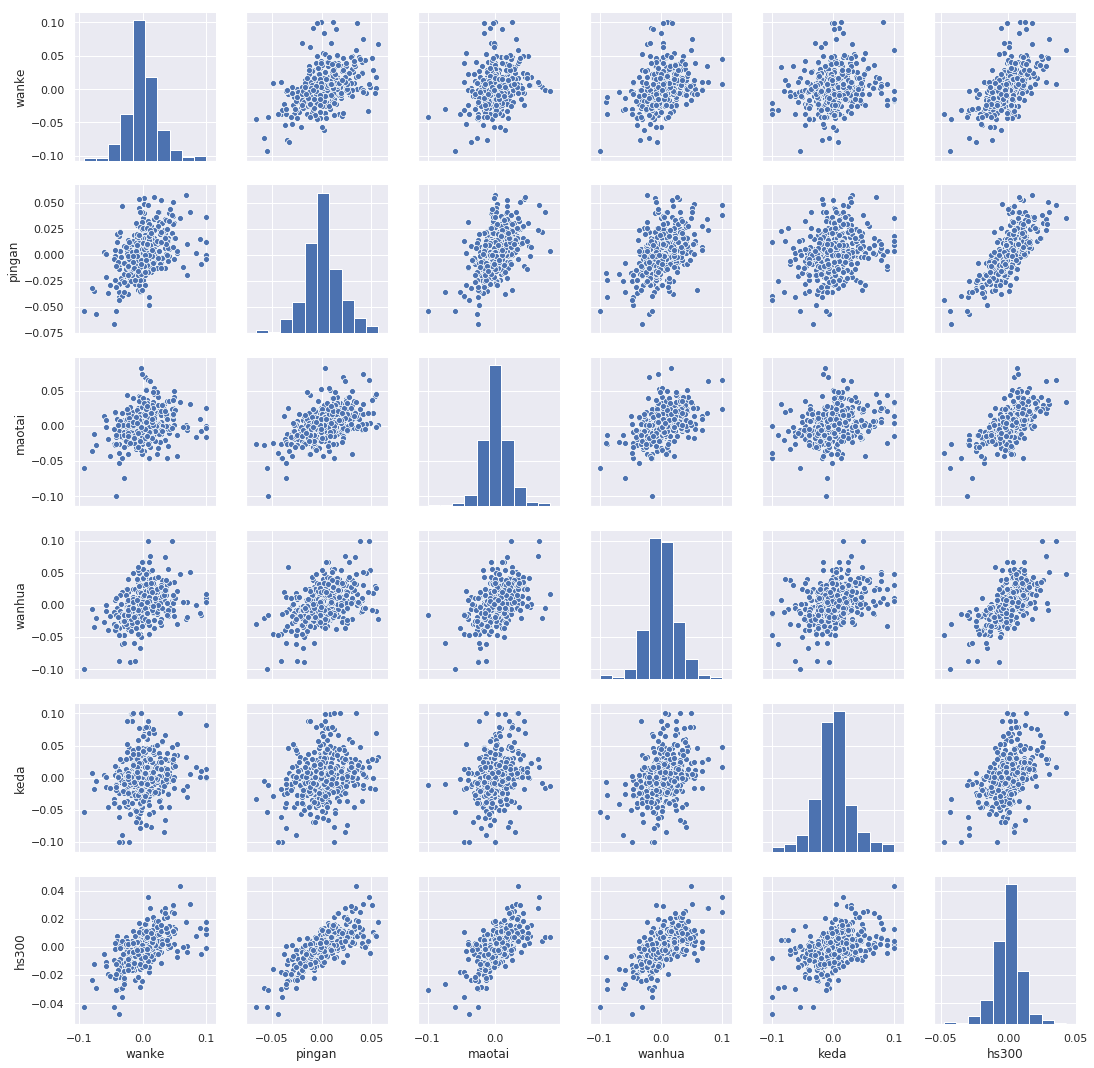

In [8]:
sns.pairplot(df_rp);
plt.show()

In [9]:
import statsmodels.api as sm
stock_names = {
 'wanke': '万科A', 
 'pingan': '中国平安', 
 'maotai': '贵州茅台', 
 'wanhua': '万华化学', 
 'keda': '科大讯⻜'
}
for stock in ['wanke', 'pingan', 'maotai', 'wanhua', 'keda']:
    model = sm.OLS(df_rp[stock], sm.add_constant(df_rp['hs300']))
    result = model.fit()
    print(stock_names[stock] + '')
    print(result.summary())
    print('')

万科A
                            OLS Regression Results                            
Dep. Variable:                  wanke   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     251.7
Date:                Sat, 12 Jan 2019   Prob (F-statistic):           4.31e-46
Time:                        00:14:43   Log-Likelihood:                 1221.6
No. Observations:                 495   AIC:                            -2439.
Df Residuals:                     493   BIC:                            -2431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.108     